In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential

# SVD - 200 Dimensions

In [2]:
X_train_200 = pd.read_csv('data/svd-200-train.csv', header=None)
X_train_200.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.005252,-0.013560,-0.007867,-0.016911,-0.018433,-0.018960,-0.011043,0.004777,-0.026965,0.063438,...,-0.007502,0.000017,-0.004262,0.005669,0.012530,-0.000369,-0.010953,-0.015376,-0.000434,-0.037892
1,0.012491,-0.021312,-0.010791,-0.020843,-0.019205,-0.022878,-0.011688,0.003812,-0.028853,0.072618,...,0.013402,-0.000207,0.003701,-0.005063,0.001639,-0.002404,0.000734,-0.019280,0.018306,0.019628
2,0.027225,-0.046861,-0.017244,-0.025060,-0.023346,-0.007615,0.000960,-0.000100,0.002158,-0.016322,...,-0.030689,-0.008760,0.013925,0.003984,-0.012520,0.002413,0.007308,-0.014777,0.007675,-0.002550
3,0.030470,-0.040777,-0.015003,0.027366,0.071245,-0.017944,-0.010504,-0.003882,-0.007058,0.002643,...,-0.000719,-0.003746,0.000049,-0.009241,0.010177,-0.008775,0.004654,0.007236,-0.001974,-0.005021
4,0.042985,-0.057601,-0.008764,0.044567,0.116571,-0.026565,-0.023426,-0.013947,-0.018174,-0.000469,...,-0.036012,0.020868,0.031079,0.026503,0.010610,0.023515,-0.033716,0.033814,0.054038,-0.040620


In [3]:
X_test_200 = pd.read_csv('data/svd-200-test.csv', header=None)
X_test_200.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.024080,-0.040219,-0.016300,-0.024721,-0.024317,-0.023194,-0.014202,0.007486,-0.007895,0.025100,...,0.018285,0.010522,0.016390,0.036001,0.017875,0.018099,0.000796,0.008951,-0.006911,-0.001840
1,0.062310,-0.094159,0.008240,-0.009508,-0.006649,0.028314,0.040965,-0.010619,-0.011797,0.039147,...,-0.002384,0.004021,0.006146,0.029058,0.018688,0.011553,-0.005140,0.007433,0.001044,-0.004237
2,0.109583,0.045117,-0.015728,-0.010687,-0.002880,-0.001391,0.005687,-0.007445,0.002788,0.004251,...,0.004379,-0.009919,-0.018508,-0.005307,-0.002563,0.003784,0.009513,0.012394,-0.002667,0.004442
3,0.116982,0.014511,-0.032015,-0.001304,0.009675,-0.012006,-0.006073,-0.005801,0.018002,-0.019039,...,-0.002608,0.000812,0.008337,-0.024127,0.013599,-0.006540,-0.009803,-0.007602,-0.005934,-0.006606
4,0.025310,-0.053041,-0.014107,-0.036522,-0.032750,-0.030626,-0.023010,0.008328,-0.004595,-0.032308,...,-0.027189,0.008026,0.010156,0.031844,0.003251,-0.022032,-0.009802,0.002932,-0.025524,0.004643


In [4]:
y_train = pd.read_csv('data/svd-train-labels.csv', header=None)
y_train.head()

,0
0,-1.0
1,-1.0
2,-1.0
3,1.0
4,1.0


In [5]:
y = np.array([max(i[0], 0) for i in y_train.to_numpy()])

In [6]:
y

array([0., 0., 0., ..., 0., 1., 1.])

In [7]:
y_test = pd.read_csv('data/svd-test-labels.csv', header=None)
y_test.head()

,0
0,-1.0
1,1.0
2,1.0
3,1.0
4,-1.0


In [8]:
y_test = np.array([max(i[0], 0) for i in y_test.to_numpy()])

In [9]:
model_200 = Sequential([
    Dense(2048, activation='relu', input_shape=(200,)),
    Dense(1, activation='sigmoid')
    
])

In [10]:
model_200.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy']
             )

In [11]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [12]:
model_200.fit(X_train_200, y, 
          validation_data=(X_test_200,y_test),
          epochs=100,
         callbacks=[es]
         )

Epoch 1/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1874 - accuracy: 0.9317 - val_loss: 0.1598 - val_accuracy: 0.9394
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1344 - accuracy: 0.9483 - val_loss: 0.1368 - val_accuracy: 0.9506
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1131 - accuracy: 0.9564 - val_loss: 0.1103 - val_accuracy: 0.9598
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0950 - accuracy: 0.9642 - val_loss: 0.1040 - val_accuracy: 0.9621
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0819 - accuracy: 0.9700 - val_loss: 0.1050 - val_accuracy: 0.9628
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0721 - accuracy: 0.9733 - val_loss: 0.1004 - val_accuracy: 0.9646
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0636 - accuracy: 0.9775 - val_loss: 0.1078 - val_ac

In [13]:
pred_200 = np.round(model_200.predict(X_test_200))

# SVD - 500 Dimensions 

In [14]:
X_train_500 = pd.read_csv('data/svd-500-train.csv', header=None)
X_test_500 = pd.read_csv('data/svd-500-test.csv', header=None)

In [15]:
model_500 = Sequential([
    Dense(2048, activation='relu', input_shape=(500,)),
    Dense(1, activation='sigmoid')
    
])

model_500.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy']
             )

In [16]:
model_500.fit(X_train_500, y, 
              validation_data=(X_test_500,y_test),
              epochs=100,
              callbacks=[es]
         )

Epoch 1/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1769 - accuracy: 0.9333 - val_loss: 0.1252 - val_accuracy: 0.9527
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1133 - accuracy: 0.9568 - val_loss: 0.1013 - val_accuracy: 0.9623
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0874 - accuracy: 0.9674 - val_loss: 0.0993 - val_accuracy: 0.9627
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0633 - accuracy: 0.9772 - val_loss: 0.0884 - val_accuracy: 0.9678
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0455 - accuracy: 0.9844 - val_loss: 0.0914 - val_accuracy: 0.9679
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0932 - val_accuracy: 0.9683
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0225 - accuracy: 0.9936 - val_loss: 0.0898 - val_ac

In [17]:
pred_500 = np.round(model_500.predict(X_test_500))

# Evaluate Neural Networks

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
def evaluate_model(model, train, y_train, test, y_test):
    pred_train = np.round(model.predict(train))
    pred_test = np.round(model.predict(test))
    
    train_acc = accuracy_score(y_train, pred_train)
    train_f1 = f1_score(y_train, pred_train)
    train_precision = precision_score(y_train, pred_train)
    train_recall = recall_score(y_train, pred_train)
    
    test_acc = accuracy_score(y_test, pred_test)
    test_f1 = f1_score(y_test, pred_test)
    test_precision = precision_score(y_test, pred_test)
    test_recall = recall_score(y_test, pred_test)
    
    
    plt.figure(figsize=(5,5))
    cm = confusion_matrix(y_train, pred_train)
    sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
    plt.title("Train: True Labels vs Predicted Labels")
    
    plt.figure(figsize=(5,5))
    cm = confusion_matrix(y_test, pred_test)
    sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
    plt.title("Test: True Labels vs Predicted Labels")
    
    print("Train Accuracy:  %f" % (train_acc))
    print("Train F1-Score:  %f" %(train_f1))
    print("Train Precision: %f" %(train_precision))
    print("Train Recall:    %f" %(train_recall))
    print()
    print("Test Accuracy:   %f" % (test_acc))
    print("Test F1-Score:   %f" %(test_f1))
    print("Test Precision:  %f" %(test_precision))
    print("Test Recall:     %f" %(test_recall))
    
    metrics = {
        'train_accuracy': train_acc,
        'train_f1':train_f1,
        'train_precision':train_precision,
        'train_recall':train_recall,
        'test_accuracy':test_acc,
        'test_f1':test_f1,
        'test_precision':test_precision,
        'test_recall':test_recall,
    }
    return metrics
    

Train Accuracy:  0.988900
Train F1-Score:  0.988834
Train Precision: 0.993632
Train Recall:    0.984082

Test Accuracy:   0.963500
Test F1-Score:   0.963547
Test Precision:  0.966540
Test Recall:     0.960573


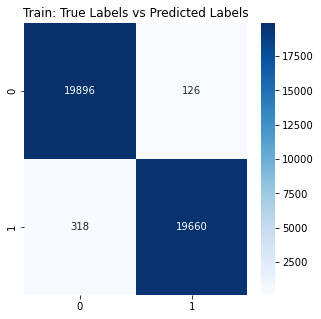

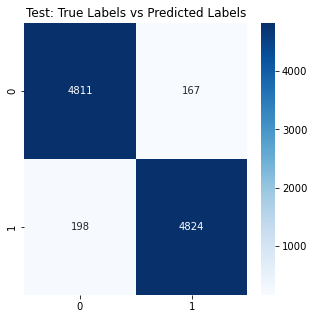

In [20]:
model_200_metrics = evaluate_model(model_200, X_train_200, y, X_test_200, y_test)

Train Accuracy:  0.998025
Train F1-Score:  0.998023
Train Precision: 0.997699
Train Recall:    0.998348

Test Accuracy:   0.970000
Test F1-Score:   0.970131
Test Precision:  0.970131
Test Recall:     0.970131


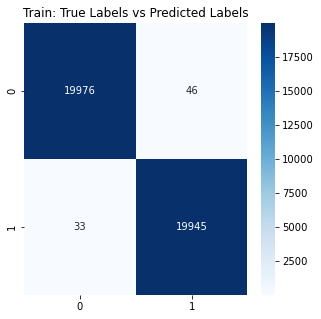

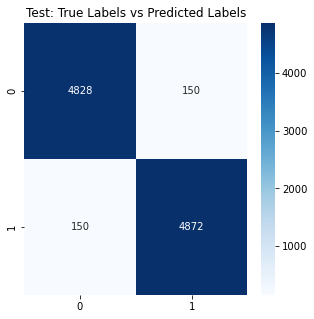

In [21]:
model_500_metrics = evaluate_model(model_500, X_train_500, y, X_test_500, y_test)